In [1]:
import sys
sys.path.insert(0, 'C:/Users/Can/Dropbox/PC (2)/Desktop/My Numerical Calculations/Single Particle/Hofstadter')
from Hard_Core_BC_Hofstadter_Hamiltonian_Matrix import *

lx= 40 , ly= 40


In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

C:\Users\Can\AppData\Local\Temp\ipykernel_12228\50440616.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
  a[:,[i]]=psi_0


<IPython.core.display.Javascript object>


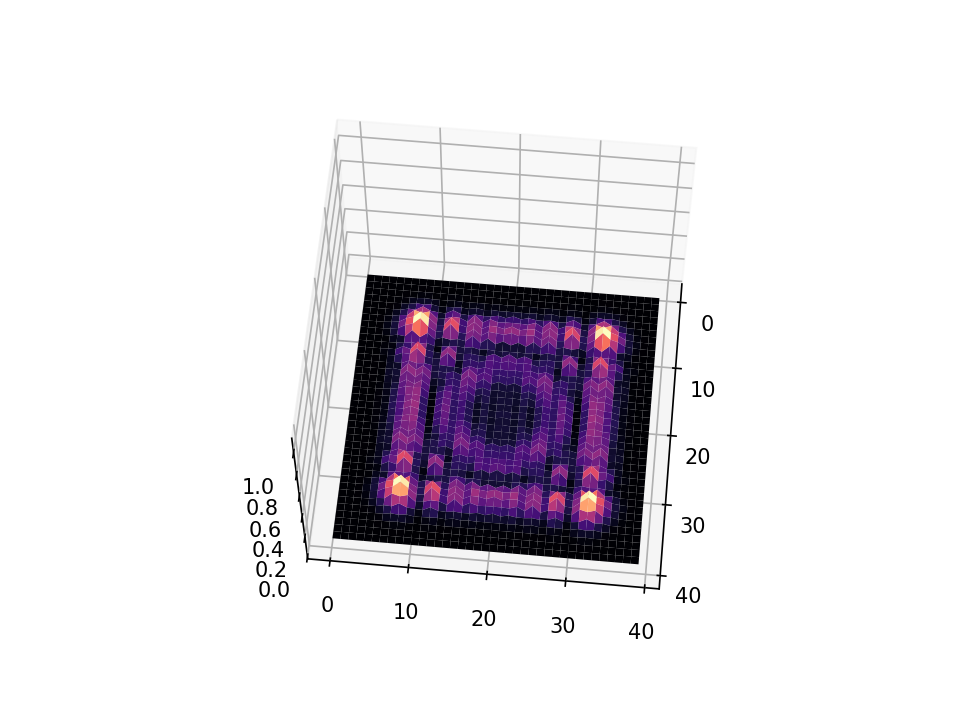

In [5]:
# from scipy import linalg

#Frame Per Second
fps = 5000 
#Frame Number of Animation
frn = 1500 

#40x40 için:
#5-6 Kenar
#819-820 Merkez

#Position of Inital Wave Function
start_lattice_size_1=819
start_lattice_size_2=820

#Normalization of State Vector
psi_0=np.zeros((L_x*L_y,1))/np.sqrt(2)
psi_0[start_lattice_size_1]=1
psi_0[start_lattice_size_2]=1

#Delta t
delta_t=0.01

#q Values Have To Be Eaxct Multiple of Lattice Size (Presence of Magnetic Field)
#alpha=0 (Absence of Magnetic Field)
alpha=(1/(L_x/4))*0
#Küçük boyutlu matris için seri açılım ile matris üsteli hemen hemen çok yakın farka sahipler
#yani delta_t=0.01 yeterince küçük.
#Series Expansion of Time Evolution Operator (Useful Way to Calculation)
time_evo=np.identity(L_x*L_y)-1.j*delta_t*HardHMat(alpha)

#Exact Time Evolution Operator (Memory Error!)
# time_evo_2=linalg.expm(-1.j*delta_t*HardHMat(alpha))

#Create Time Evolution Array
a = np.zeros((L_x*L_y,frn))
for i in range(1,frn):
    psi_0=np.matmul(time_evo, psi_0)
    a[:,[i]]=psi_0
    
#Create meshgrid
X = x_co
Y = y_co
xv, yv = np.meshgrid(X, Y)
def update_plot(frame_number, a, plot):
    #remove the older one to new plot 
    plot[0].remove()
    #Plot density of wave function according to x and y corrdinate
    plot[0] = ax.plot_surface(xv, yv, np.reshape((np.abs(a[:,[frame_number]])*4)**2, (L_x,L_y)), cmap="magma")

#create plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#set view position is top
ax.view_init(90,0)
#first off all plot initial wave function
plot = [ax.plot_surface(xv, yv, np.reshape((np.abs(a[:,[0]]))**2, (L_x,L_y)), color='0.75', rstride=1, cstride=1)]
ax.set_zlim(0,1.1)
#Call animation function to update plot each for loop
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(a, plot), interval=1000/fps)
#Save Your Animation as .gif Format
#ani.save('animation.gif', writer='imagemagick', fps=200)